In [2]:
import pandas as pd
import seaborn as sns

In [3]:
inj_df = pd.read_pickle("/Users/jchoudhri1/Injuries/Data/mg_il_ps_merged_df.p")
inj_df

,Date,Team,Relinquished,Notes,Player,Reg_games_missed,Post_games_missed,Out_for_season,Season,Year,...,category,Pos,Age,Team_y,G,GS,MPPG,TGP_prior_seasons,TMP_current_season,TMP_prior_seasons
0,2010-08-03,Los Angeles Clippers,Craig Smith,arthroscopic surgery on right knee (out indefi...,Craig Smith,0.0,0.0,,off,2009,...,knee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-08-13,Dallas Mavericks,Rodrigue Beaubois,surgery on left foot to repair broken fifth me...,Rodrigue Beaubois,0.0,0.0,,off,2009,...,foot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-08-14,Golden State Warriors,Ekpe Udoh,surgery on left wrist (out indefinitely),Ekpe Udoh,0.0,0.0,,off,2009,...,arm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-09-21,Toronto Raptors,Ed Davis (a),arthroscopic surgery on right kene to repair t...,Ed Davis,0.0,0.0,,off,2009,...,knee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-09-21,Oklahoma City Thunder,Nenad Krstic,surgery on right hand to repair broken finger ...,Nenad Krstic,0.0,0.0,,off,2009,...,hand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16769,2019-05-20,Golden State Warriors,Andre Iguodala,placed on IL with left calf injury,Andre Iguodala,0.0,1.0,0,post,2018,...,lower leg,SF,35.0,Golden State Warriors,21.0,15.0,30.0,1232.0,630.0,41122.7
16770,2019-06-05,Golden State Warriors,Kevon Looney,placed on IL with fractured collarbone,Kevon Looney,0.0,1.0,0,post,2018,...,torso,C,22.0,Golden State Warriors,21.0,1.0,20.6,225.0,432.6,3243.4
16771,2019-06-13,Golden State Warriors,Kevin Durant,placed on IL with torn right Achilles tendon (...,Kevin Durant,0.0,0.0,1,post,2018,...,lower leg,SF,30.0,Golden State Warriors,12.0,12.0,36.8,976.0,441.6,36453.2
16772,2019-07-01,Philadelphia 76ers,Amir Johnson,placed on IL,Amir Johnson,NaN,NaN,1,off,2018,...,healthy inactive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
years = inj_df.groupby(['Year'])['category'].count()
years

Year
2009      25
2010    1821
2011    2018
2012    1944
2013    2473
2014    1489
2015    1714
2016    1843
2017    1930
2018    1517
Name: category, dtype: int64

In [5]:
inj_df['Tot_games_missed'] = inj_df['Reg_games_missed'] + inj_df['Post_games_missed']

In [74]:
data = inj_df.groupby(['Year'])['Tot_games_missed'].sum()
data

Year
2009        0.0
2010     7122.0
2011     5524.0
2012     5686.0
2013     6463.0
2014     6388.0
2015     6496.0
2016     6460.0
2017    10353.0
2018     5917.0
Name: Tot_games_missed, dtype: float64

Text(0.5, 0, 'Year')

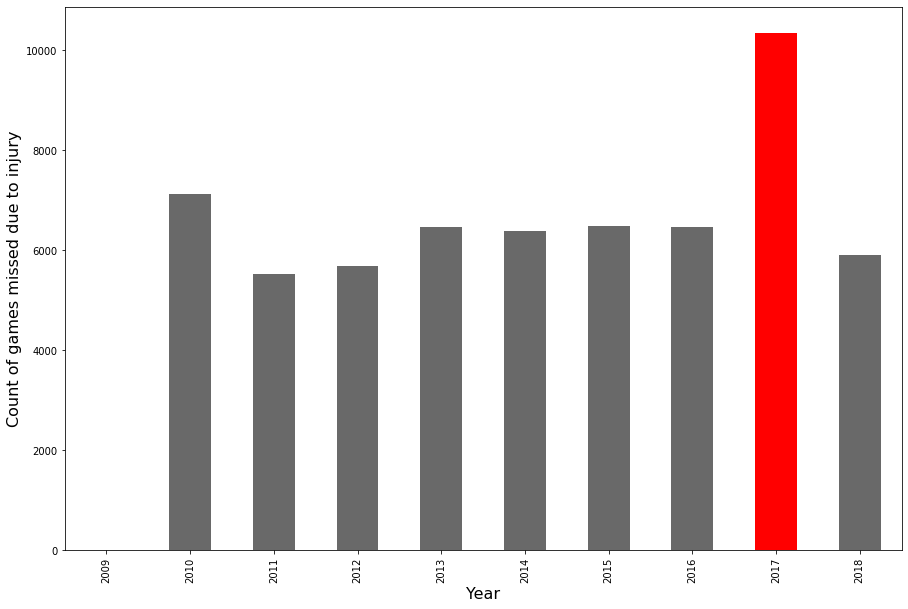

In [76]:
ax = data.plot(kind='bar', stacked= True, figsize = (15,10), color = ['dimgray', 'dimgray', 'dimgray', 'dimgray', 'dimgray', 'dimgray', 'dimgray', 'dimgray', 'red'])
ax.set_ylabel("Count of games missed due to injury", fontsize = 16)
ax.set_xlabel("Year", fontsize = 16)

In [8]:
a = inj_df.groupby(['category'])['Tot_games_missed'].count()
a1 = a.drop('n/a')
a1 = a.drop('healthy inactive')
a1 = a.drop('other')
a1 = a.drop('rest')
a1

category
arm                  416
foot                 977
hand                 476
head                 439
healthy inactive    3658
knee                2444
leg                   90
lower leg           2701
n/a                    2
other                495
sick                 989
torso               1542
upper leg           1610
Name: Tot_games_missed, dtype: int64

In [9]:
dictio = {'Category': ['arm', 'foot', 'hand', 'head', 'knee', 'leg', 'lower leg', 'sick', 'torso', 'upper leg'], 
      'Count': [416, 977, 476, 439, 2444, 90, 2701, 989, 1542, 1610]}
df = pd.DataFrame(dictio)
df

,Category,Count
0,arm,416
1,foot,977
2,hand,476
3,head,439
4,knee,2444
5,leg,90
6,lower leg,2701
7,sick,989
8,torso,1542
9,upper leg,1610


In [10]:
df['Count'].sum()

11684

In [27]:
df1 = df.drop(index = 5)
df1 = df.drop(index = 7)
df1

,Category,Count
0,arm,416
1,foot,977
2,hand,476
3,head,439
4,knee,2444
5,leg,90
6,lower leg,2701
8,torso,1542
9,upper leg,1610


In [28]:
df1['frequency (%)'] = ((df1['Count'] / df1['Count'].sum())*100)
df1

,Category,Count,frequency (%)
0,arm,416,3.889668
1,foot,977,9.135110
2,hand,476,4.450678
3,head,439,4.104722
4,knee,2444,22.851800
5,leg,90,0.841515
6,lower leg,2701,25.254792
8,torso,1542,14.417952
9,upper leg,1610,15.053763


In [29]:
df1['frequency (%)'] = pd.to_numeric(df1['frequency (%)'])
df1

,Category,Count,frequency (%)
0,arm,416,3.889668
1,foot,977,9.135110
2,hand,476,4.450678
3,head,439,4.104722
4,knee,2444,22.851800
5,leg,90,0.841515
6,lower leg,2701,25.254792
8,torso,1542,14.417952
9,upper leg,1610,15.053763


In [30]:
new_row = {'Category':'total', 'Count': df1['Count'].sum(), 'frequency (%)': df1['frequency (%)'].sum()}
df2 = df1.append(new_row, ignore_index = True)
df2 = df2.round({'frequency (%)': 2})
df2

,Category,Count,frequency (%)
0,arm,416,3.89
1,foot,977,9.14
2,hand,476,4.45
3,head,439,4.10
4,knee,2444,22.85
5,leg,90,0.84
6,lower leg,2701,25.25
7,torso,1542,14.42
8,upper leg,1610,15.05
9,total,10695,100.00


In [15]:
df2.to_csv('/Users/jchoudhri1/Desktop/Injuries/injury-data-v.csv', index = False)

In [42]:
player_df = pd.read_pickle("/Users/jchoudhri1/Desktop/Injuries/cleaned/inactive_list_cleaned.p")
player_df.head(10)

,Date,Team,Acquired,Relinquished,Notes,Player
0,2010-10-26,Portland Trailblazers,NaN,Elliot Williams,placed on IL,Elliot Williams
1,2010-10-26,Phoenix Suns,NaN,Matt Janning,placed on IL,No Match
2,2010-10-26,Houston Rockets,NaN,Patrick Patterson,placed on IL,Patrick Patterson
3,2010-10-26,Houston Rockets,NaN,Kyle Lowry,placed on IL with back spasms,Kyle Lowry
4,2010-10-26,Houston Rockets,NaN,Jermaine Taylor,placed on IL,Jermaine Taylor
5,2010-10-26,Los Angeles Lakers,NaN,Luke Walton,placed on IL with strained right hamstring,Luke Walton
6,2010-10-26,Los Angeles Lakers,NaN,Andrew Bynum,placed on IL recovering from surgery on right ...,Andrew Bynum
7,2010-10-26,Miami Heat,NaN,Mike Miller,placed on IL recovering from surgery on right ...,Mike Miller
8,2010-10-26,Phoenix Suns,NaN,Gani Lawal,placed on IL,Gani Lawal
9,2010-10-26,Miami Heat,NaN,Dexter Pittman,placed on IL,Dexter Pittman


In [43]:
players = player_df[player_df.Relinquished.notnull()]
players=player_df.drop(['Acquired'],axis=1)
players

,Date,Team,Relinquished,Notes,Player
0,2010-10-26,Portland Trailblazers,Elliot Williams,placed on IL,Elliot Williams
1,2010-10-26,Phoenix Suns,Matt Janning,placed on IL,No Match
2,2010-10-26,Houston Rockets,Patrick Patterson,placed on IL,Patrick Patterson
3,2010-10-26,Houston Rockets,Kyle Lowry,placed on IL with back spasms,Kyle Lowry
4,2010-10-26,Houston Rockets,Jermaine Taylor,placed on IL,Jermaine Taylor
...,...,...,...,...,...
14130,2019-06-07,Golden State Warriors,NaN,activated from IL,Kevon Looney
14131,2019-06-10,Golden State Warriors,NaN,activated from IL,Kevin Durant
14132,2019-06-13,Golden State Warriors,Kevin Durant,placed on IL with torn right Achilles tendon (...,Kevin Durant
14133,2019-07-01,Philadelphia 76ers,Amir Johnson,placed on IL,Amir Johnson


# Analysis of teams and player injury info

In [44]:
import datetime as dt
import numpy as np

In [45]:
lastFive=players[(players.Date.dt.year <= 2019) & (players.Date.dt.year >=2014)]
lastFive

,Date,Team,Relinquished,Notes,Player
4532,2014-01-01,Los Angeles Clippers,Reggie Bullock,placed on IL,Reggie Bullock
4533,2014-01-01,Los Angeles Clippers,NaN,activated from IL,Maalik Wayns
4534,2014-01-01,New Orleans Pelicans,NaN,activated from IL,Eric Gordon
4535,2014-01-01,Portland Trailblazers,NaN,activated from IL,CJ McCollum
4536,2014-01-02,Orlando Magic,Solomon Jones,placed on IL with sprained left ankle,Solomon Jones
...,...,...,...,...,...
14130,2019-06-07,Golden State Warriors,NaN,activated from IL,Kevon Looney
14131,2019-06-10,Golden State Warriors,NaN,activated from IL,Kevin Durant
14132,2019-06-13,Golden State Warriors,Kevin Durant,placed on IL with torn right Achilles tendon (...,Kevin Durant
14133,2019-07-01,Philadelphia 76ers,Amir Johnson,placed on IL,Amir Johnson


<AxesSubplot:xlabel='count', ylabel='Team'>

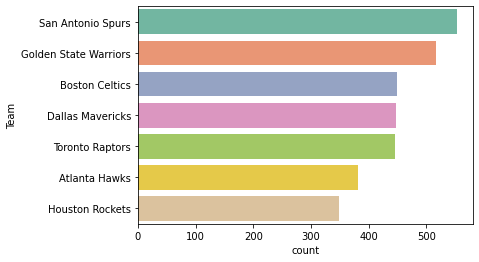

In [46]:
sns.countplot(y="Team",data=lastFive,order=lastFive.Team.value_counts().iloc[:7].index,palette="Set2")

#### It looks like the San Antonio Spurs have had the greatest amount of injuries from 2014-2019. Important to remember age of Spurs / issues with medical staff (according to Kawhi Leonard).

<AxesSubplot:xlabel='count', ylabel='Relinquished'>

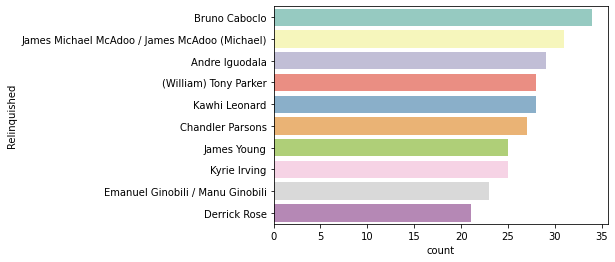

In [50]:
sns.countplot(y = "Relinquished",data = lastFive,order = lastFive.Relinquished.value_counts().iloc[:10].index, palette="Set3")

### Examining Different Injury Histories of Most Injured Players

In [58]:
cabo = players[(players.Relinquished == "Bruno Caboclo")]
del cabo['Player']
cabo.head()

,Date,Team,Relinquished,Notes
5221,2014-10-29,Toronto Raptors,Bruno Caboclo,placed on IL
5326,2014-11-07,Toronto Raptors,Bruno Caboclo,placed on IL
5379,2014-11-13,Toronto Raptors,Bruno Caboclo,placed on IL
5402,2014-11-15,Toronto Raptors,Bruno Caboclo,placed on IL
5504,2014-11-26,Toronto Raptors,Bruno Caboclo,placed on IL


In [67]:
iggy = players[(players.Relinquished == "Andre Iguodala")]
del iggy['Player']
list(set(iggy['Notes'].values))

['placed on IL with right knee tendinitis (out for season)',
 'placed on IL',
 'placed on IL with right knee injury',
 'placed on IL with tightness in left hamstring',
 'placed on IL with bruised left calf',
 'placed on IL with strained left hip',
 'placed on IL with left hamstring injury',
 'placed on IL with right Achilles tendinitis',
 'placed on IL with strained back',
 'placed on IL with stiffness in lower back',
 'placed on IL with right hip injury',
 'placed on IL with strained left hamstring',
 'placed on IL with toe injury',
 'placed on IL with tighness in hamstring',
 'placed on IL with sprained left wrist',
 'placed on IL with sore left knee',
 'placed on IL with right Achilles tendon injury',
 'placed on IL for rest',
 'placed on IL with right knee tendinitis',
 'placed on IL with left calf injury',
 'placed on IL with sprained left ankle',
 'placed on IL with illness',
 'placed on IL with flu',
 'placed on IL with dental ailment']

In [68]:
klaw = players[(players.Relinquished == "Kawhi Leonard")]
del klaw['Player']
list(set(klaw['Notes'].values))

['placed on IL with upper respiratory infection',
 'placed on IL with bruised right quadriceps',
 'placed on IL',
 'placed on IL with partial tear in left shoulder',
 'placed on IL with rehab of right quadriceps',
 'placed on IL with strained right calf',
 'placed on IL with concussion',
 'placed on IL with sore left ankle',
 'placed on IL with left knee injury',
 'placed on IL recovering from right quadriceps injury (out for season)',
 'placed on IL with fractured right hand',
 'placed on IL with infection in right eye',
 'placed on IL with right hip injury',
 'placed on IL with knee injury',
 'placed on IL with gastroenteritis',
 'placed on IL with sore left knee',
 'placed on IL for rest',
 'placed on IL with bruised right hand',
 'placed on IL with sprained left ankle',
 'placed on IL with left knee tendinitis']

In [70]:
ky = players[(players.Relinquished == "Kyrie Irving")]
del ky['Player']
list(set(ky['Notes'].values))

['placed on IL with sore right shoulder',
 'placed on IL with bruised right quadriceps',
 'placed on IL',
 'placed on IL with bruised left knee',
 'placed on IL with sprained right ankle',
 'placed on IL with concussion',
 'placed on IL with sprained left shoulder',
 'placed on IL with strained left bicep',
 'placed on IL with strained left hip',
 'placed on IL with minor facial fracture',
 'placed on IL with left thigh injury',
 'placed on IL with bruised quadriceps',
 'placed on IL with right eye injury',
 'placed on IL with strained right knee',
 'placed on IL with sore left knee',
 'placed on IL with bruised right knee',
 'placed on IL for rest',
 'placed on IL recovering from surgery on left knee to repair fractured kneecap',
 'placed on IL with sore lower back',
 'placed on IL with sore left shoulder',
 'placed on IL with flu',
 'placed on IL with fractured left index finger']

# Analysis on 2018-2019 Season

In [82]:
season2019=players[(players.Date.dt.year == 2019) | ((players.Date.dt.year == 2018) & (players.Date.dt.month > 9))]
season2019 = season2019[season2019.Relinquished.notnull()]
season2019.head()

,Date,Team,Relinquished,Notes,Player
12475,2018-10-01,Oklahoma City Thunder,Andre Roberson,placed on IL recovering from surgery on left k...,Andre Roberson
12476,2018-10-16,Philadelphia 76ers,Mike Muscala,placed on IL with sprained right ankle,Mike Muscala
12477,2018-10-16,Philadelphia 76ers,Jerryd Bayless,placed on IL with sprained left knee,Jerryd Bayless
12478,2018-10-16,Philadelphia 76ers,Wilson Chandler,placed on IL with strained left hamstring,Wilson Chandler
12479,2018-10-16,Boston Celtics,Robert Williams III,placed on IL,Robert Williams


<AxesSubplot:xlabel='count', ylabel='Team'>

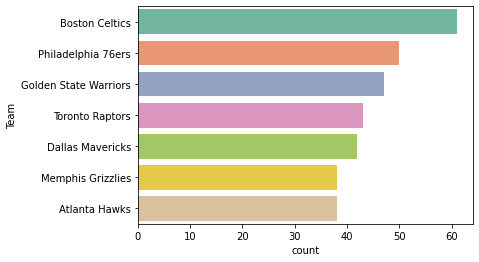

In [83]:
sns.countplot(y="Team",data=season2019,order=season2019.Team.value_counts().iloc[:7].index,palette="Set2")

<AxesSubplot:xlabel='count', ylabel='Relinquished'>

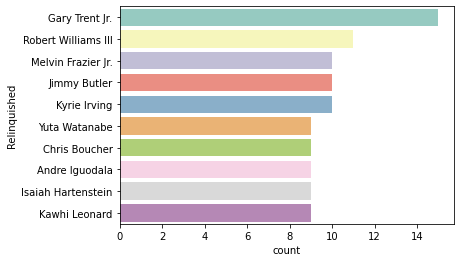

In [84]:
sns.countplot(y = "Relinquished",data = season2019,order = season2019.Relinquished.value_counts().iloc[:10].index, palette="Set3")

### Analysis of Jimmy Butler Injury History for 2018-2019 Season

In [85]:
jb = season2019[(season2019.Relinquished == "Jimmy Butler")]
del jb['Player']
list(set(jb['Notes'].values))

['placed on IL with strained groin',
 'placed on IL with upper respiratory infection',
 'placed on IL with tightness in lower back',
 'placed on IL',
 'placed on IL with back injury',
 'placed on IL with sprained right wrist']